In [18]:
#ライブラリのインストール p11
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import mglearn
from sklearn.model_selection import train_test_split


#準備
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

#In[35]-------------------------
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0))) # 使用された特徴量を取得する


Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00


In [12]:
#In[36]
# max_iterの値を増やしている
# こうしておかないとモデルが、"max_iter"を増やすように警告を発する
# alphaを増やすと係数はより０に近くなる
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso001.coef_ != 0))) # 使用された特徴量を取得する



Training set score: 0.90
Test set score: 0.77
Number of features used: 33.00


In [14]:
#In[37]
lasso00001 = Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso00001.coef_ != 0))) # 使用された特徴量を取得する



Training set score: 0.95
Test set score: 0.65
Number of features used: 97.00


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.181797420264, tolerance: 3.233182126649076
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Coefficient magnitude')

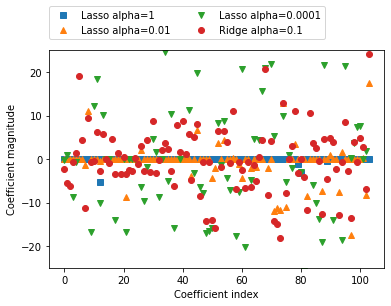

In [20]:
#In[38]
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05)) # ncol=2は凡例を２列で表現するということ
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


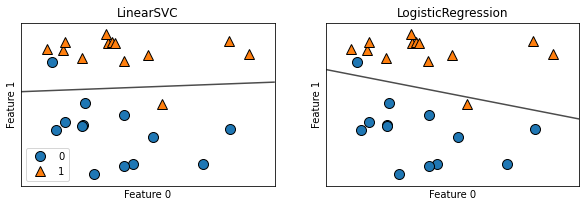

In [23]:
#In[39]
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

# figオブジェクトとaxesオブジェクトを生成
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    # plot_2d_separatorは境界線を決定するメソッド
    #第一引数に分類モデルを渡して、第二引数に元のデータを渡す
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

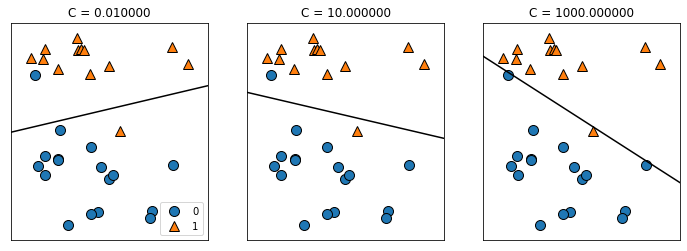

In [24]:
#In[40]
mglearn.plots.plot_linear_svc_regularization()

In [27]:
#In[41]
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
      

Training set score: 0.955
Test set score: 0.951


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#In[42]
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
      

Training set score: 0.953
Test set score: 0.965


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#In[43]
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))
      

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


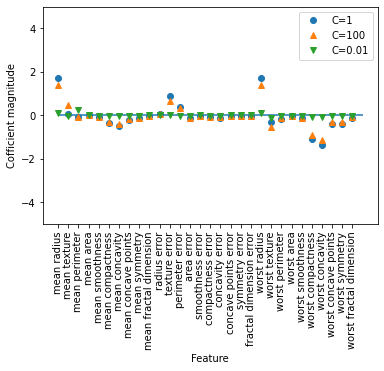

In [35]:
#In[44]
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
# 目盛りを作成 項目を90°回転
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 

# 横線の補助線を表示する
plt.hlines(0, 0, cancer.data.shape[1])

plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Cofficient magnitude") # Cofficient magnitude=係数の大きさ
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


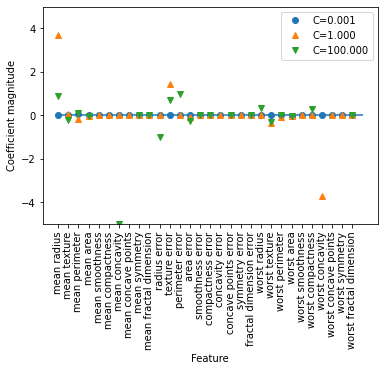

In [41]:
#In[45]
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # penaltyで正則化の方法を設定, solverが必要
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

#文字を90度回転させる
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend()


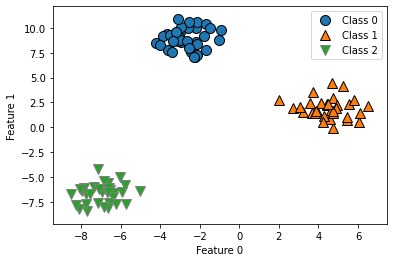

In [43]:
#In[46]
from sklearn.datasets import make_blobs

X, y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [44]:
#In[47]
linear_svm = LinearSVC().fit(X,y)
# 係数配列の形状
print("Coefficient shape: ", linear_svm.coef_.shape)
# 切片配列の形状
print("Intercept shape: ", linear_svm.intercept_.shape)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


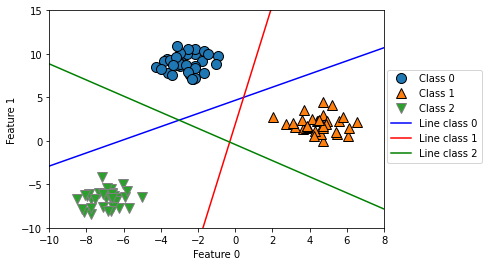

In [45]:
#In[48]
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)　# 等差数列を作成
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']): #　直線の色を指定
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

# -(line * coef[0] + intercept) / coef[1]とは？
# 上記でクラス分類確信度の式をw[0] × x[0] + w[1] × x[1] + ・・・ + w[p] × x[p] + bとした。
# w[0]をcoef[0]，w[1]をcoef[1]，x[0]をline=x，w[1]をy，bをinterceptとしてこの式に当てはめるとcoef[0] * line + coef[1] * y + interceptとなる。
#クラス分類確信度の式がクラス0の分類器では0より大きくなり，他の分類器では0より小さくなるため，直線上では0より大きくも小さくもなく分類できず0となる。
#そのためこの式が0の時y =の形にするとy = -(line * coef[0] + intercept) / coef[1]となる。この式によって直線が表されている。


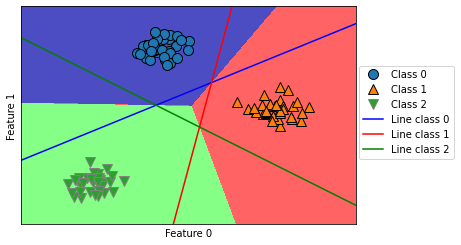

In [48]:
#In[49]
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

In [5]:
#In[53]
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

#In[54]
counts = {}
for label in np.unique(y): # uniqueは重複を排除した配列を作る[0, 1]
    counts[label] = X[y == label].sum(axis=0)
    print("Feature counts:\n{}".format(counts))
    
#np.unique(y)の処理として，yに含まれる数値が0と1のため，label=0とlabel=1の2回ループを行う。ループ1回目の処理では，y==0の行を探す。
#該当するのは1行目（[0, 1, 0, 1]）と3行目（[0, 0, 0, 1]）なので，
#この2つの行をsum(axis=0)により特徴量ごとに加算して数えると，0: array([0, 1, 0, 2]となる。
#ループ2回目ではy==1の行を探して，同様の処理を行う。

NameError: name 'np' is not defined